### All the packages that will be needed for natural language processing

In [54]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from spacy.lang.en import English
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import preprocessor as prepro # text prepro
import tqdm #progress bar
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
import seaborn as sns
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
import spacy #spacy for quick language prepro
nlp = spacy.load('en_core_web_sm') #instantiating English module
import scipy.sparse as ss

# sampling, splitting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


# loading ML libraries
from sklearn.pipeline import make_pipeline #pipeline creation
from sklearn.feature_extraction.text import TfidfVectorizer #transforms text to sparse matrix
from sklearn.linear_model import LogisticRegression #Logit model
from sklearn.metrics import classification_report #that's self explanatory
from sklearn.decomposition import TruncatedSVD #dimensionality reduction
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import altair as alt #viz

#explainability
import eli5
from eli5.lime import TextExplainer

# topic modeling

from gensim.corpora.dictionary import Dictionary # Import the dictionary builder
from gensim.models import LdaMulticore # we'll use the faster multicore version of LDA

# Import pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%matplotlib inline
pyLDAvis.enable_notebook()

In [55]:
# prepro settings
# This is prob not relevant, since it has to do with tweets? 
# prepro.set_options(prepro.OPT.URL, prepro.OPT.NUMBER, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.SMILEY)

### Loading and appending the datasets

In [56]:
scopus2022 = pd.read_csv('scopus 2022 2021.csv',  sep = ',')
scopus = pd.read_csv('scopus.csv',  sep = ',')

In [57]:
data = scopus2022.append(scopus, ignore_index=True)

C:\Users\maart\AppData\Local\Temp\ipykernel_4396\3402760882.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = scopus2022.append(scopus, ignore_index=True)


In [58]:
data

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Yang T., Zhang X.",57907798100;56342888200;,FinTech adoption and financial inclusion: Evid...,2022,Journal of Banking and Finance,145,NaN,106668,NaN,NaN,...,NaN,JBFID,NaN,English,J. Bank. Financ.,Article,Final,NaN,Scopus,2-s2.0-85138806241
1,"Wang X., Wang Y., Zhao Y.",57193015825;57901727900;57901783600;,Financial permeation and rural poverty reducti...,2022,China Economic Review,76,NaN,101863,NaN,NaN,...,NaN,NaN,NaN,English,China Econ. Rev.,Article,Final,NaN,Scopus,2-s2.0-85138589769
2,"Dzandu M.D., Hanu C., Amegbe H.",56590001600;57201152816;57194904537;,Gamification of mobile money payment for gener...,2022,Technological Forecasting and Social Change,185,NaN,122049,NaN,NaN,...,NaN,NaN,NaN,English,Technol. Forecast. Soc. Change,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85138450268
3,"Grassi L., Fantaccini S.",57192656409;57895835500;,An overview of Fintech applications to solve t...,2022,Financial Innovation,8,1,84,NaN,NaN,...,NaN,NaN,NaN,English,Financial Innov.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85138286241
4,"DeFusco A.A., Tang H., Yannelis C.",57193852071;57890330600;55413678100;,Measuring the welfare cost of asymmetric infor...,2022,Journal of Financial Economics,146,3,NaN,821,840.0,...,NaN,JFECD,NaN,English,J. Financ. Econ.,Article,Final,NaN,Scopus,2-s2.0-85138101180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,Fayard E.H.,35072693600;,ACC pressure cleaning,2010,"Power Engineering (Barrington, Illinois)",114,5,NaN,22,NaN,...,NaN,POENA,NaN,English,Power Eng. Barrington Ill,Short Survey,Final,NaN,Scopus,2-s2.0-77953829082
3396,"Dassanayake M.M.K., Tilakarathne C.",57221353725;55762978100;,Predicting trading signals of Sri Lankan stock...,2010,"Technological Developments in Networking, Educ...",NaN,NaN,NaN,269,273,...,9789048191505,NaN,NaN,English,"Technol. Dev. Networking, Educ. Autom.",Conference Paper,Final,NaN,Scopus,2-s2.0-84878897261
3397,Hao H.-N.,36617357100;,Notice of Retraction: Short-term forecasting o...,2010,Proceedings - 2010 6th International Conferenc...,4,NaN,5584528,1838,1841,...,9781424459612,NaN,NaN,English,"Proc. - Int. Conf. Nat. Comput., ICNC",Retracted,Final,NaN,Scopus,2-s2.0-78149350510
3398,"Ma Z.-X., Zhang W.",55479146300;56621528900;,Notice of Retraction: An discrimination resear...,2010,ICAMS 2010 - Proceedings of 2010 IEEE Internat...,3,NaN,5553273,116,119,...,9781424469291,NaN,NaN,English,ICAMS - Proc. IEEE Int. Conf. Adv. Manage. Sci.,Retracted,Final,NaN,Scopus,2-s2.0-77957273781


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        3400 non-null   object 
 1   Author(s) ID                   3399 non-null   object 
 2   Title                          3400 non-null   object 
 3   Year                           3400 non-null   int64  
 4   Source title                   3400 non-null   object 
 5   Volume                         2320 non-null   object 
 6   Issue                          1426 non-null   object 
 7   Art. No.                       1051 non-null   object 
 8   Page start                     2336 non-null   object 
 9   Page end                       2326 non-null   object 
 10  Page count                     38 non-null     float64
 11  Cited by                       2164 non-null   float64
 12  DOI                            2972 non-null   o

In [60]:
data.describe(include='object')


,Authors,Author(s) ID,Title,Source title,Volume,Issue,Art. No.,Page start,Page end,DOI,...,ISSN,ISBN,CODEN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
count,3400,3399,3400,3400,2320,1426,1051,2336,2326,2972,...,2540,1174,276,3400,3396,3400,3400,1097,3400,3400
unique,3167,3156,3389,1455,495,81,1023,1013,1369,2969,...,949,821,124,4,1429,13,2,7,1,3400
top,[No author name available],[No author id available],Introduction,ACM International Conference Proceeding Series,8,1,8,1,20,10.1142/9789811235825_0003,...,21945357,9781799832591; 9781799832577,JEBUD,English,ACM Int. Conf. Proc. Ser.,Article,Final,"All Open Access, Gold",Scopus,2-s2.0-85138806241
freq,58,58,4,93,95,322,4,158,11,2,...,53,15,15,3395,93,1770,3241,278,3400,1


In [61]:
data['Author Keywords']

0       Consumption; Consumption inequality; Credit co...
1       Bank branch expansion; Financial permeation; F...
2       Customer value; FinTech; Gamification; Marketi...
3       Crowdfunding; Fintech; Health crowdfunding; He...
4       Asymmetric information; Consumer credit; Exper...
                              ...                        
3395                                                  NaN
3396                                                  NaN
3397    Genetic-neural network; Short-term forecasting...
3398    Discrimination analysis; Insider trading; Mark...
3399    correlation dimension; KSE-100 index returns; ...
Name: Author Keywords, Length: 3400, dtype: object

In [62]:
data = data[['Authors', 'Author(s) ID','Title', 'Abstract','Year', 'Source title', 'Author Keywords']]

In [63]:
data['Author Keywords'] = data['Author Keywords'].astype({'Author Keywords':'string'})

C:\Users\maart\AppData\Local\Temp\ipykernel_4396\3149525087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Author Keywords'] = data['Author Keywords'].astype({'Author Keywords':'string'})


In [64]:
data['Author Keywords']

0       Consumption; Consumption inequality; Credit co...
1       Bank branch expansion; Financial permeation; F...
2       Customer value; FinTech; Gamification; Marketi...
3       Crowdfunding; Fintech; Health crowdfunding; He...
4       Asymmetric information; Consumer credit; Exper...
                              ...                        
3395                                                 <NA>
3396                                                 <NA>
3397    Genetic-neural network; Short-term forecasting...
3398    Discrimination analysis; Insider trading; Mark...
3399    correlation dimension; KSE-100 index returns; ...
Name: Author Keywords, Length: 3400, dtype: string

In [65]:
data.dropna(inplace = True)

C:\Users\maart\AppData\Local\Temp\ipykernel_4396\339833404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [66]:
data['Author Keywords'].head()

0    Consumption; Consumption inequality; Credit co...
1    Bank branch expansion; Financial permeation; F...
2    Customer value; FinTech; Gamification; Marketi...
3    Crowdfunding; Fintech; Health crowdfunding; He...
4    Asymmetric information; Consumer credit; Exper...
Name: Author Keywords, dtype: string

In [67]:
data['Author Keywords'].isnull().value_counts()

False    2781
Name: Author Keywords, dtype: int64

#### Preprocessing the data for Author Keywords column

In [68]:
# run progress bar and clean up using spacy but without some heavy parts of the pipeline

clean_text = []

pbar = tqdm.tqdm(total=len(data['Author Keywords']),position=0, leave=True)

for text in nlp.pipe(data['Author Keywords'], disable=["tagger", "parser", "ner"]):

  txt = [token.lemma_.lower() for token in text 
         if token.is_alpha 
         and not token.is_stop 
         and not token.is_punct]

  clean_text.append(" ".join(txt))

  pbar.update(1)

5562it [1:42:53,  1.11s/it]:00<?, ?it/s]
c:\Users\maart\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
 92%|█████████▏| 2561/2781 [00:01<00:00, 1519.90it/s]

In [69]:
# write everything into one function that can be re-used later
def text_prepro(texts):
  """
  takes in a pandas series (1 column of a DF)
  removes twitter stuff
  lowercases, normalizes text
  """
  texts_clean = texts.map(lambda t: prepro.clean(t))
  clean_container = []

  pbar = tqdm.tqdm(total=len(texts_clean),position=0, leave=True)

  for text in nlp.pipe(texts_clean, disable=["tagger", "parser", "ner"]):

    txt = [token.lemma_.lower() for token in text 
          if token.is_alpha 
          and not token.is_stop 
          and not token.is_punct]

    clean_container.append(" ".join(txt))
    pbar.update(1)
  
  return clean_container

In [70]:
# apply all prepro-pipeline to texts
data['Author_Keywords'] = text_prepro(data['Author Keywords'])

100%|██████████| 2781/2781 [00:01<00:00, 1615.55it/s]
C:\Users\maart\AppData\Local\Temp\ipykernel_4396\4189515260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Author_Keywords'] = text_prepro(data['Author Keywords'])


In [71]:
# preprocess texts (we need tokens)
tokens = []

for summary in nlp.pipe(data['Author Keywords'], disable=["ner"]):
  proj_tok = [token.lemma_.lower() for token in summary 
              if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] 
              and not token.is_stop
              and not token.is_punct] 
  tokens.append(proj_tok)

In [72]:
data['tokens'] = tokens

C:\Users\maart\AppData\Local\Temp\ipykernel_4396\2173657068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = tokens


In [73]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(data['tokens'])
dictionary.filter_extremes(no_below=50, no_above=0.5, keep_n=1000)
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in data['tokens']]

#### Preprocessing the data for Abstract column

In [74]:
# run progress bar and clean up using spacy but without some heavy parts of the pipeline

clean_text_2 = []

pbar_2 = tqdm.tqdm(total=len(data['Abstract']),position=0, leave=True)

for text_2 in nlp.pipe(data['Abstract'], disable=["tagger", "parser", "ner"]):

  txt_2 = [token_2.lemma_.lower() for token_2 in text_2 
         if token_2.is_alpha 
         and not token_2.is_stop 
         and not token_2.is_punct]

  clean_text.append(" ".join(txt_2))

  pbar_2.update(1)

100%|██████████| 2781/2781 [1:30:25<00:00,  1.95s/it]
c:\Users\maart\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|█████████▉| 2776/2781 [00:22<00:00, 235.01it/s]]

In [75]:
# write everything into one function that can be re-used later
def text_prepro_2(texts_2):
  """
  takes in a pandas series (1 column of a DF)
  removes twitter stuff
  lowercases, normalizes text
  """
  texts_clean_2 = texts_2.map(lambda t: prepro.clean(t))
  clean_container_2 = []

  pbar_2 = tqdm.tqdm(total=len(texts_clean_2),position=0, leave=True)

  for text_2 in nlp.pipe(texts_clean_2, disable=["tagger", "parser", "ner"]):

    txt_2 = [token_2.lemma_.lower() for token_2 in text_2 
          if token_2.is_alpha 
          and not token_2.is_stop 
          and not token_2.is_punct]

    clean_container_2.append(" ".join(txt_2))
    pbar_2.update(1)
  
  return clean_container_2

In [76]:
# apply all prepro-pipeline to texts
data['Abstract'] = text_prepro_2(data['Abstract'])

100%|██████████| 2781/2781 [00:20<00:00, 135.26it/s]
C:\Users\maart\AppData\Local\Temp\ipykernel_4396\41527334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Abstract'] = text_prepro_2(data['Abstract'])


In [77]:
# preprocess texts (we need tokens)
tokens_2 = []

for summary in nlp.pipe(data['Abstract'], disable=["ner"]):
  proj_tok_2 = [token_2.lemma_.lower() for token_2 in summary 
              if token_2.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] 
              and not token_2.is_stop
              and not token_2.is_punct] 
  tokens_2.append(proj_tok_2)

In [78]:
data['tokens_2'] = tokens_2

C:\Users\maart\AppData\Local\Temp\ipykernel_4396\2808454871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens_2'] = tokens_2


In [79]:
# Create a Dictionary from the articles: dictionary
dictionary_2 = Dictionary(data['tokens_2'])
dictionary_2.filter_extremes(no_below=50, no_above=0.5, keep_n=1000)
# construct corpus using this dictionary
corpus_2 = [dictionary_2.doc2bow(doc) for doc in data['tokens_2']]

### UML

In [80]:
#Importing UML packages
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [82]:
sparse_matrix =tfidf.fit_transform(data['Author Keywords'])

In [83]:
#Import nmf
from sklearn.decomposition import NMF

In [84]:
#Using 4 components in order to determine relevancy
nmf = NMF(n_components=5)

In [85]:
matrix_nmf = nmf.fit_transform(sparse_matrix)

In [86]:
matrix_nmf.shape

(2781, 5)

In [87]:
data['Author Keywords'].shape

(2781,)

In [88]:
nmf.components_.shape

(5, 3841)

In [89]:
matrix_nmf.shape

(2781, 5)

<AxesSubplot:>

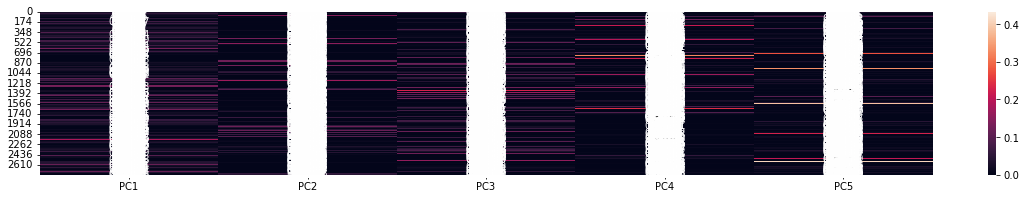

In [90]:
#2 components are more relevant
plt.figure(figsize=(20,3))

sns.heatmap(pd.DataFrame(matrix_nmf, columns=['PC1','PC2','PC3','PC4','PC5']), annot=True)

### LDA For Abstract

In [91]:
lda_model_2 = LdaMulticore(corpus_2, id2word=dictionary_2, num_topics=5, workers = 4, passes=10, random_state = 60)

In [92]:
# Let's try to visualize
lda_display_2 = pyLDAvis.gensim_models.prepare(lda_model_2, corpus_2, dictionary_2)

c:\Users\maart\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [93]:
 # Let's Visualize
pyLDAvis.display(lda_display_2)

In [94]:
topic_dist_2 = lda_model_2[corpus_2]

In [95]:
dist_2 = []

for t_2 in topic_dist_2:
    dist_2.append(t_2)  
    
# add list to the data frame
data['Topic Distribution_2'] = dist_2

C:\Users\maart\AppData\Local\Temp\ipykernel_4396\1577890192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Topic Distribution_2'] = dist_2


In [96]:
data.reset_index(inplace=True)

In [97]:
list_topicnum_2 = []
for itm in range(len(data)):
    list_topicnum_2.append(sorted(data['Topic Distribution_2'][itm], key=lambda tup: tup[1], reverse=True)[0][0])
data['topic_num:2'] = list_topicnum_2

C:\Users\maart\AppData\Local\Temp\ipykernel_4396\1449392197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topic_num:2'] = list_topicnum_2


In [98]:
# We change the cluster numbers to qualitively interpreted labels
data['topic_num_2'] = data['topic_num_2'].replace(0,'')
data['topic_num_2'] = data['topic_num_2'].replace(1,'')
data['topic_num_2'] = data['topic_num_2'].replace(2,'')
data['topic_num_2'] = data['topic_num_2'].replace(3,'')
data['topic_num_2'] = data['topic_num_2'].replace(4,'')

KeyError: 'topic_num_2'

In [ ]:
#Checking if we need to fix the distribution of the data
data['topic_num_2'].value_counts()

In [ ]:
data['labels_2'] = data['topic_num_2'] 

### LDA For Author Keywords

In [ ]:
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, workers = 4, passes=10, random_state = 60)

In [ ]:
# Let's try to visualize
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [ ]:
 # Let's Visualize
pyLDAvis.display(lda_display)

In [ ]:
topic_dist = lda_model[corpus]

In [ ]:
dist = []

for t in topic_dist:
    dist.append(t)  
    
# add list to the data frame
data['Topic Distribution'] = dist

In [ ]:
data.reset_index(inplace=True)

In [ ]:
list_topicnum = []
for itm in range(len(data)):
    list_topicnum.append(sorted(data['Topic Distribution'][itm], key=lambda tup: tup[1], reverse=True)[0][0])
data['topic_num'] = list_topicnum

In [ ]:
# We change the cluster numbers to qualitively interpreted labels
data['topic_num'] = data['topic_num'].replace(0,'Fintech')
data['topic_num'] = data['topic_num'].replace(1,'AI')
data['topic_num'] = data['topic_num'].replace(2,'Cryptocurrency')
data['topic_num'] = data['topic_num'].replace(3,'Digital Banking')
data['topic_num'] = data['topic_num'].replace(4,'Risk Exposure')

In [ ]:
#Checking if we need to fix the distribution of the data
data['topic_num'].value_counts()

In [ ]:
data['topic_num'].info()

In [ ]:
data['labels'] = data['topic_num'] 

#### Training the SML model

In [ ]:
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# le_keywords = LabelEncoder()
# # le_text_clean = LabelEncoder()

In [ ]:
# data['Keyword_ID'] = le_keywords.fit_transform(data['Author Keywords'])

In [ ]:
# data['text_clean_ID'] = le_text_clean.fit_transform(data['text_clean'])

In [ ]:
# from collections import Counter
# from numpy.random import RandomState
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()

In [ ]:
# # Here we use oversampling, since the distribution of the y value is skewed 
# X_train_SMOTE, y_train_SMOTE = smote.fit_resample(data['Abstract'], data['topic_num'])

In [ ]:
# Splitting the dataset into the Training set and Test set (since we have a new output variable)
X_train, X_test, y_train, y_test = train_test_split(data['Abstract'], data['topic_num'], test_size = 0.2, random_state = 42)

In [ ]:
#instantiate models and "bundle up as pipeline"

tfidf = TfidfVectorizer()
cls = LogisticRegression()

pipe1 = make_pipeline(tfidf, cls)

In [ ]:
# from sklearn.linear_model import LinearRegression
# model_ols = LinearRegression()

In [ ]:
# model_ols.fit(X_train, y_train)

In [ ]:
# from xgboost import XGBRegressor
# model_xgb = XGBRegressor()

In [ ]:
# #Running the model for training
# model_xgb.fit(X_train, y_train)

In [ ]:
pipe.fit(X_train,y_train) # fit model

In [ ]:
# evaluate model performance on training set

y_eval = pipe.predict(X_train)
report = classification_report(y_train, y_eval)
print(report)

In [ ]:
# evaluate model performance on test set

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
t1 = ['haha i want to kill myself with a bomb risk risk risk']

In [ ]:
t1_p = text_prepro(pd.Series(t1))

In [ ]:
pipe.predict (t1_p)

### We will use a coherence matrix Author Keywords

In [ ]:
# cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
# coherence = cm.get_coherence()  # get coherence value

In [ ]:
data = data.reset_index()

In [ ]:
data.shape

(2781, 12)

In [ ]:
data = data[data["tokens"].str.len() != 0]

KeyError: 'tokens'

In [ ]:
corpus = data['tokens']

In [ ]:
data.tokens.value_counts().reset_index()

In [ ]:
dirichlet_dict = corpora.Dictionary(corpus)
bow_corpus = [dirichlet_dict.doc2bow(text) for text in corpus]

# Considering 1-15 topics, as the last is cut off
num_topics = list(range(10)[1:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=bow_corpus,
                             id2word=dirichlet_dict,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=10,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

In [ ]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [ ]:
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [ ]:
coherences = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dirichlet_dict, coherence='c_v').get_coherence() for i in num_topics[:-1]]

In [ ]:
num_keywords = len(coherences)

In [ ]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()  

### We will use a coherence matrix Abstract Keywords

In [ ]:
data = data.reset_index()

In [ ]:
data = data[data["tokens_2"].str.len() != 0]

In [ ]:
corpus_2 = data['tokens_2']

In [ ]:
data.tokens_2.value_counts().reset_index()

In [ ]:
dirichlet_dict = corpora.Dictionary(corpus_2)
bow_corpus = [dirichlet_dict.doc2bow(text_2) for text_2 in corpus_2]

# Considering 1-15 topics, as the last is cut off
num_topics = list(range(10)[1:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus_2=bow_corpus,
                             id2word=dirichlet_dict,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=10,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]